<a href="https://colab.research.google.com/github/ashima80garg/HackerRank_Python/blob/main/Pandas_test_solns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and Feature Engineering:

1. Load the dataset and handle missing values intelligently.
2. Create new features: AgeGroup (categorize ages into groups), FamilySize combine SibSp and
Parch), and Title (extract from Name).
3. Convert categorical variables into numerical form using one-hot encoding or similar methods.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 1.1
# 1 Handle the missing values
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# handling the missing value for age: replace with mean
val=df["age"].mean()
val

29.69911764705882

In [ ]:
df["age"]=df["age"].fillna(value=val)

In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# for deck, replace with the most frequent value
df.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
df=df.fillna(value="C")

In [ ]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
# Create new features: AgeGroup (categorize ages into groups), FamilySize (combine SibSp and Parch), and Title (extract from Name).

In [ ]:
# AgeGroup (categorize ages into groups)

df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [ ]:
individual_data_types = df.age.apply(type)

In [ ]:
individual_data_types.value_counts()

<class 'float'>    891
Name: age, dtype: int64

In [ ]:
df.shape

(891, 15)

<Axes: ylabel='Frequency'>

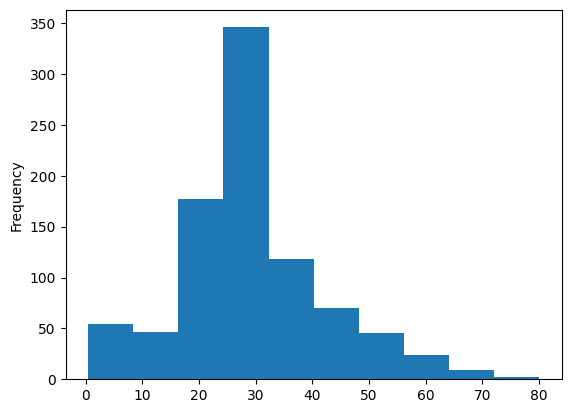

In [ ]:
df.age.plot(kind="hist")

In [ ]:
df1=df[df.age<10]
df2=df[(df.age>=10) & (df.age<20)]
df3=df[(df.age>=20) & (df.age<30)]
df4=df[(df.age>=30) & (df.age<40)]
df5=df[(df.age>=40) & (df.age<50)]
df6=df[(df.age>=50) & (df.age<60)]
df7=df[(df.age>=60) & (df.age<70)]
df8=df[(df.age>=70) & (df.age<80)]
df9=df[(df.age>=80) & (df.age<90)]
df9.shape

(1, 15)

In [ ]:
df1=df[df.age<10]
df1.loc[:,"age"]=1

<ipython-input-15-dc465c1f6587>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,"age"]=1
<ipython-input-15-dc465c1f6587>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.loc[:,"age"]=1


In [ ]:
# set value=1 for all ages in df1 (having all ages less than 10)
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
10,1,3,female,1,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
16,0,3,male,1,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
24,0,3,female,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
43,1,2,female,1,1,2,41.5792,C,Second,child,False,C,Cherbourg,yes,False


In [ ]:
df2=df[(df.age>=10) & (df.age<20)]
df2.loc[:,"age"]=2
df2.head()

<ipython-input-17-53a6f04ed6c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,"age"]=2
<ipython-input-17-53a6f04ed6c2>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:,"age"]=2


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,2,1,0,30.0708,C,Second,child,False,C,Cherbourg,yes,False
14,0,3,female,2,0,0,7.8542,S,Third,child,False,C,Southampton,no,True
22,1,3,female,2,0,0,8.0292,Q,Third,child,False,C,Queenstown,yes,True
27,0,1,male,2,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,2,2,0,18.0000,S,Third,woman,False,C,Southampton,no,False


In [ ]:
df3=df[(df.age>=20) & (df.age<30)]
df3.loc[:,"age"]=3
df3.head()

<ipython-input-18-fc70bf6d34b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,"age"]=3
<ipython-input-18-fc70bf6d34b6>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[:,"age"]=3


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
2,1,3,female,3,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
5,0,3,male,3,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
8,1,3,female,3,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False
12,0,3,male,3,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [ ]:
df4=df[(df.age>=30) & (df.age<40)]
df4.loc[:,"age"]=4
df4.head()

<ipython-input-19-afaf27c1a055>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:,"age"]=4
<ipython-input-19-afaf27c1a055>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df4.loc[:,"age"]=4


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,4,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,4,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,4,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
13,0,3,male,4,1,5,31.2750,S,Third,man,True,C,Southampton,no,False
18,0,3,female,4,1,0,18.0000,S,Third,woman,False,C,Southampton,no,False


In [ ]:
df5=df[(df.age>=40) & (df.age<50)]
df5.loc[:,"age"]=5
df5.head()

<ipython-input-20-b49f775753fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[:,"age"]=5
<ipython-input-20-b49f775753fa>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df5.loc[:,"age"]=5


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
30,0,1,male,5,0,0,27.7208,C,First,man,True,C,Cherbourg,no,True
35,0,1,male,5,1,0,52.0000,S,First,man,True,C,Southampton,no,False
40,0,3,female,5,1,0,9.4750,S,Third,woman,False,C,Southampton,no,False
52,1,1,female,5,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
62,0,1,male,5,1,0,83.4750,S,First,man,True,C,Southampton,no,False


In [ ]:
df6=df[(df.age>=50) & (df.age<60)]
df6.loc[:,"age"]=6
df6.head()

<ipython-input-21-ba728ee9e6ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.loc[:,"age"]=6
<ipython-input-21-ba728ee9e6ac>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df6.loc[:,"age"]=6


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,0,1,male,6,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,6,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,6,0,0,16.0000,S,Second,woman,False,C,Southampton,yes,True
94,0,3,male,6,0,0,7.2500,S,Third,man,True,C,Southampton,no,True
124,0,1,male,6,0,1,77.2875,S,First,man,True,D,Southampton,no,False


In [ ]:
df7=df[(df.age>=60) & (df.age<70)]
df7.loc[:,"age"]=7
df7.head()

<ipython-input-22-e1ca52faee10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.loc[:,"age"]=7
<ipython-input-22-e1ca52faee10>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df7.loc[:,"age"]=7


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,7,0,0,10.5000,S,Second,man,True,C,Southampton,no,True
54,0,1,male,7,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
170,0,1,male,7,0,0,33.5000,S,First,man,True,B,Southampton,no,True
252,0,1,male,7,0,0,26.5500,S,First,man,True,C,Southampton,no,True
275,1,1,female,7,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False


In [ ]:
df8=df[(df.age>=70) & (df.age<80)]
df8.loc[:,"age"]=8
df8.head()

<ipython-input-23-ac48d9c799e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.loc[:,"age"]=8
<ipython-input-23-ac48d9c799e8>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df8.loc[:,"age"]=8


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,8,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,8,0,0,7.7500,Q,Third,man,True,C,Queenstown,no,True
493,0,1,male,8,0,0,49.5042,C,First,man,True,C,Cherbourg,no,True
672,0,2,male,8,0,0,10.5000,S,Second,man,True,C,Southampton,no,True
745,0,1,male,8,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [ ]:
df9=df[(df.age>=80) & (df.age<90)]
df9.loc[:,"age"]=9
df9.head()

<ipython-input-24-bddf1614f335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.loc[:,"age"]=9
<ipython-input-24-bddf1614f335>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df9.loc[:,"age"]=9


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,9,0,0,30.0,S,First,man,True,A,Southampton,yes,True


In [ ]:
df10=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])
df10.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
10,1,3,female,1,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
16,0,3,male,1,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
24,0,3,female,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
43,1,2,female,1,1,2,41.5792,C,Second,child,False,C,Cherbourg,yes,False


In [ ]:
# df10 is the new dataframe having categorical ages
df10.shape

(891, 15)

In [ ]:
df.shape

(891, 15)

In [ ]:
df10.index

Int64Index([  7,  10,  16,  24,  43,  50,  58,  63,  78, 119,
            ...
            684, 694, 829,  96, 116, 493, 672, 745, 851, 630],
           dtype='int64', length=891)

In [ ]:
df10

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
10,1,3,female,1,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
16,0,3,male,1,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
24,0,3,female,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
43,1,2,female,1,1,2,41.5792,C,Second,child,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0,1,male,8,0,0,49.5042,C,First,man,True,C,Cherbourg,no,True
672,0,2,male,8,0,0,10.5000,S,Second,man,True,C,Southampton,no,True
745,0,1,male,8,1,1,71.0000,S,First,man,True,B,Southampton,no,False
851,0,3,male,8,0,0,7.7750,S,Third,man,True,C,Southampton,no,True


In [ ]:
# Reset the index
df_new = df10.reset_index(drop=True)
df_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
1,1,3,female,1,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
2,0,3,male,1,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
3,0,3,female,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
4,1,2,female,1,1,2,41.5792,C,Second,child,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,male,8,0,0,49.5042,C,First,man,True,C,Cherbourg,no,True
887,0,2,male,8,0,0,10.5000,S,Second,man,True,C,Southampton,no,True
888,0,1,male,8,1,1,71.0000,S,First,man,True,B,Southampton,no,False
889,0,3,male,8,0,0,7.7750,S,Third,man,True,C,Southampton,no,True


In [ ]:
# df_new is the final df for categorical ages, it has updated age column

In [ ]:
# FamilySize (combine SibSp and Parch)
df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
1,1,3,female,1,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
2,0,3,male,1,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
3,0,3,female,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
4,1,2,female,1,1,2,41.5792,C,Second,child,False,C,Cherbourg,yes,False


In [ ]:
df_new.parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

In [ ]:
df_new.sibsp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [ ]:
df["parch"]=df.parch.astype("string")

In [ ]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch           string
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [ ]:
df["sibsp"]=df.sibsp.astype("string")
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp           string
parch           string
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [ ]:
df_new["FamilySize"]=df["sibsp"]+df["parch"]

In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,FamilySize
0,0,3,male,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,10
1,1,3,female,1,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,10
2,0,3,male,1,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False,00
3,0,3,female,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,10
4,1,2,female,1,1,2,41.5792,C,Second,child,False,C,Cherbourg,yes,False,00


In [ ]:
# df_new is the final dataset having 2 modified columns age and familysize

In [ ]:
# Title (extract from Name)

In [ ]:
df_new["embark_town"].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
C                2
Name: embark_town, dtype: int64

In [ ]:
# renaming this attribute to Title

In [ ]:
df_new=df_new.rename(columns={"embark_town":"Title"})

In [ ]:
# 2. df_new is the new df having: AgeGroup (categorize ages into groups), FamilySize (combine SibSp andParch), and Title (extract from Name).

In [ ]:
# 3. Convert categorical variables into numerical form using one-hot encoding or similar methods (dummy variables)
df_dummy=pd.get_dummies(df_new,columns=["sex","embarked","class","who","adult_male","deck","alive","alone"],drop_first=True)
df_dummy.head()

,survived,pclass,age,sibsp,parch,fare,Title,FamilySize,sex_male,embarked_Q,...,who_woman,adult_male_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,alive_yes,alone_True
0,0,3,1,3,1,21.0750,Southampton,10,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,3,1,1,1,16.7000,Southampton,10,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,3,1,4,1,29.1250,Queenstown,00,1,1,...,0,0,0,1,0,0,0,0,0,0
3,0,3,1,3,1,21.0750,Southampton,10,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,1,1,2,41.5792,Cherbourg,00,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# df_dummy is the final df having all one-hot vector encoding

# Complex Data Analysis:

In [ ]:
'''
1.2 Complex Data Analysis:
1. Analyze the survival rate based on the newly created features (AgeGroup, FamilySize, and Title).
2. Investigate the correlation between fare paid and survival, taking into account passenger class and embarkation point.
3. Perform a survival rate comparison between different age groups within each passenger class.
'''

In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,Title,alive,alone,FamilySize
0,0,3,male,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,10
1,1,3,female,1,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,10
2,0,3,male,1,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False,00
3,0,3,female,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,10
4,1,2,female,1,1,2,41.5792,C,Second,child,False,C,Cherbourg,yes,False,00


In [ ]:
# Analyze the survival rate based on the newly created features (AgeGroup, FamilySize, and Title).

df_sur=df_new.groupby("age").survived.sum()
df_sur

age
1     38
2     41
3    129
4     73
5     34
6     20
7      6
8      0
9      1
Name: survived, dtype: int64

In [ ]:
# age-vise survival rate

total_df1=len(df1)
total_df1

62

In [ ]:
sur_df1=df_sur.iloc[0]
sur_df1

38

In [ ]:
# percentage of survived for age<10
perc_df1=sur_df1/total_df1
perc_df1

0.6129032258064516

In [ ]:
# percentage of survived for age<20
total_df2=len(df2)
sur_df2=df_sur.iloc[1]
perc_df2=sur_df2/total_df2
perc_df2

0.4019607843137255

In [ ]:
# percentage of survived for age<30
total_df3=len(df3)
sur_df3=df_sur.iloc[2]
perc_df3=sur_df3/total_df3
perc_df3

0.3249370277078086

In [ ]:
# percentage of survived for age<40
total_df4=len(df4)
sur_df4=df_sur.iloc[3]
perc_df4=sur_df4/total_df4
perc_df4

0.437125748502994

In [ ]:
# percentage of survived for age<50
total_df5=len(df5)
sur_df5=df_sur.iloc[4]
perc_df5=sur_df5/total_df5
perc_df5

0.38202247191011235

In [ ]:
# percentage of survived for age<60
total_df6=len(df6)
sur_df6=df_sur.iloc[5]
perc_df6=sur_df6/total_df6
perc_df6

0.4166666666666667

In [ ]:
# percentage of survived for age<70
total_df7=len(df7)
sur_df7=df_sur.iloc[6]
perc_df7=sur_df7/total_df7
perc_df7

0.3157894736842105

In [ ]:
# percentage of survived for age<80
total_df8=len(df8)
sur_df8=df_sur.iloc[7]
perc_df8=sur_df8/total_df8
perc_df8

0.0

In [ ]:
# percentage of survived for age<90
total_df9=len(df9)
sur_df9=df_sur.iloc[8]
perc_df9=sur_df9/total_df9
perc_df9

1.0

<BarContainer object of 9 artists>

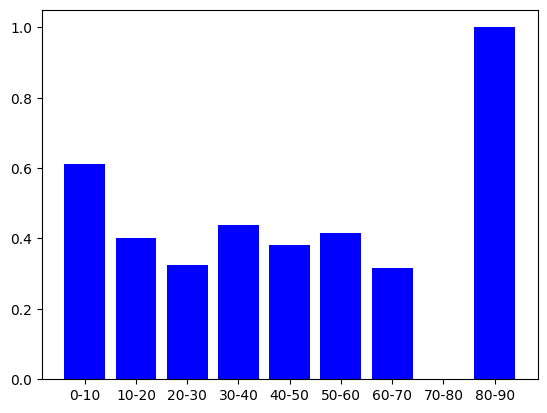

In [ ]:
# bar chart for age-vise survival
import matplotlib.pyplot as plt
y = [perc_df1,perc_df2,perc_df3,perc_df4,perc_df5,perc_df6,perc_df7,perc_df8,perc_df9]
x = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']

plt.bar(x,y,color='blue')

In [ ]:
# the above graph depicts the ratio of survival per class but we want ratio of overall survial rate
len(df)

891

In [ ]:
# survival according to different ages
df_sur

age
1     38
2     41
3    129
4     73
5     34
6     20
7      6
8      0
9      1
Name: survived, dtype: int64

In [ ]:
# overall survival rate
c1=df_sur[1]/891
c2=df_sur[2]/891
c3=df_sur[3]/891
c4=df_sur[4]/891
c5=df_sur[5]/891
c6=df_sur[6]/891
c7=df_sur[7]/891
c8=df_sur[8]/891
c9=df_sur[9]/891

<BarContainer object of 9 artists>

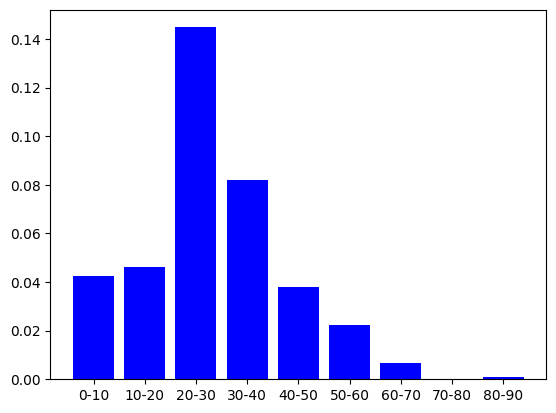

In [ ]:
# bar chart for total survival rate
import matplotlib.pyplot as plt
y = [c1,c2,c3,c4,c5,c6,c7,c8,c9]
x = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']

plt.bar(x,y,color='blue')

In [ ]:
# Analyze the survival rate based on the newly created feature Title

df_new.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,Title,alive,alone,FamilySize
0,0,3,male,1,3,1,21.075,S,Third,child,False,C,Southampton,no,False,10
1,1,3,female,1,1,1,16.700,S,Third,child,False,G,Southampton,yes,False,10


In [ ]:
data=df_new.groupby("Title").survived.sum()
data

Title
C                2
Cherbourg       93
Queenstown      30
Southampton    217
Name: survived, dtype: int64

<Axes: xlabel='Title'>

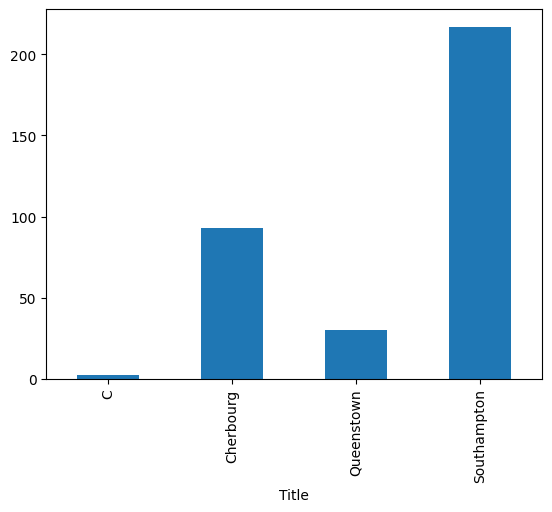

In [ ]:
data.plot(kind="bar")

In [ ]:
# 2. Investigate the correlation between fare paid and survival, taking into account passenger class and embarkation point.

df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,Title,alive,alone,FamilySize
0,0,3,male,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,10
1,1,3,female,1,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,10
2,0,3,male,1,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False,00
3,0,3,female,1,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,10
4,1,2,female,1,1,2,41.5792,C,Second,child,False,C,Cherbourg,yes,False,00


In [ ]:
df_new.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
d1=df_new[df_new.pclass==1]

In [ ]:
d1.shape

(216, 16)

In [ ]:
d1[["fare","survived"]].corr()

,fare,survived
fare,1.000000,0.190966
survived,0.190966,1.000000


In [ ]:
d2=df_new[df_new.pclass==2]
d2[["fare","survived"]].corr()

,fare,survived
fare,1.000000,0.098628
survived,0.098628,1.000000


In [ ]:
d3=df_new[df_new.pclass==3]
d3[["fare","survived"]].corr()

,fare,survived
fare,1.00000,0.00093
survived,0.00093,1.00000


In [ ]:
df_new.embarked.value_counts()

S    644
C    170
Q     77
Name: embarked, dtype: int64

In [ ]:
d4=df_new[df_new.embarked=="S"]
d4[["fare","survived"]].corr()

,fare,survived
fare,1.000000,0.247842
survived,0.247842,1.000000


In [ ]:
d5=df_new[df_new.embarked=="C"]
d5[["fare","survived"]].corr()

,fare,survived
fare,1.000000,0.264287
survived,0.264287,1.000000


In [ ]:
d6=df_new[df_new.embarked=="Q"]
d6[["fare","survived"]].corr()

,fare,survived
fare,1.000000,-0.005317
survived,-0.005317,1.000000


In [ ]:
# Perform a survival rate comparison between different age groups within each passenger class.

df_new.shape

(891, 16)

In [ ]:
# seperating the df according to pclass

p1=df_new[df_new.pclass==1]
p2=df_new[df_new.pclass==2]
p3=df_new[df_new.pclass==3]

In [ ]:
# within p1 categorize the ages

new_df1=p1[p1.age<10]
new_df2=p1[(p1.age>=10) & (p1.age<20)]
new_df3=p1[(p1.age>=20) & (p1.age<30)]
new_df4=p1[(p1.age>=30) & (p1.age<40)]
new_df5=p1[(p1.age>=40) & (p1.age<50)]
new_df6=p1[(p1.age>=50) & (p1.age<60)]
new_df7=p1[(p1.age>=60) & (p1.age<70)]
new_df8=p1[(p1.age>=70) & (p1.age<80)]
new_df9=p1[(p1.age>=80) & (p1.age<90)]

In [ ]:
a=new_df1.survived.sum()
a

136

In [ ]:
b=len(new_df1)
b

216

In [ ]:
p1_1=a/b
p1_1

0.6296296296296297

In [ ]:
a=new_df2.survived.sum()
b=len(new_df2)
p1_2=a/b
p1_2

<ipython-input-131-78dad0e63782>:3: RuntimeWarning: invalid value encountered in long_scalars
  p1_2=a/b


nan

In [ ]:
a=new_df3.survived.sum()
b=len(new_df3)
p1_3=a/b
p1_3

<ipython-input-132-66bb1e95b0e8>:3: RuntimeWarning: invalid value encountered in long_scalars
  p1_3=a/b


nan

In [ ]:
a=new_df4.survived.sum()
b=len(new_df4)
p1_4=a/b
p1_4

<ipython-input-133-3796a445cb13>:3: RuntimeWarning: invalid value encountered in long_scalars
  p1_4=a/b


nan

In [ ]:
a=new_df5.survived.sum()
b=len(new_df5)
p1_5=a/b
p1_5

<ipython-input-134-2d201e2b10a0>:3: RuntimeWarning: invalid value encountered in long_scalars
  p1_5=a/b


nan

In [ ]:
a=new_df6.survived.sum()
b=len(new_df6)
p1_6=a/b
p1_6

<ipython-input-137-f7983b6e411b>:3: RuntimeWarning: invalid value encountered in long_scalars
  p1_6=a/b


nan

In [ ]:
a=new_df7.survived.sum()
b=len(new_df7)
p1_7=a/b
p1_7

<ipython-input-139-4989486488ba>:3: RuntimeWarning: invalid value encountered in long_scalars
  p1_7=a/b


nan

In [ ]:
a=new_df8.survived.sum()
b=len(new_df8)
p1_8=a/b
p1_8

<ipython-input-140-4b6a6045e6a0>:3: RuntimeWarning: invalid value encountered in long_scalars
  p1_8=a/b


nan

In [ ]:
a=new_df9.survived.sum()
b=len(new_df9)
p1_9=a/b
p1_9

<ipython-input-141-2299286819dd>:3: RuntimeWarning: invalid value encountered in long_scalars
  p1_9=a/b


nan

In [ ]:
p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,p1_9=0,0,0,0,0,0,0,0

<BarContainer object of 9 artists>

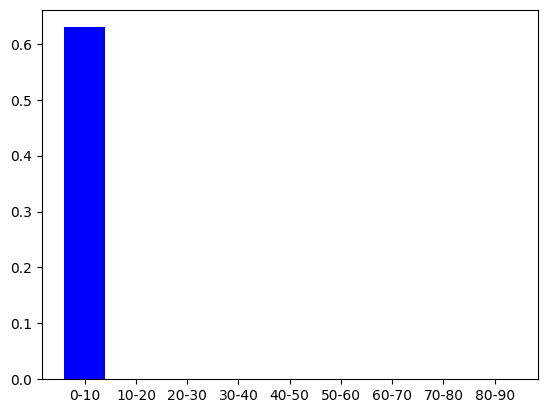

In [ ]:
# bar chart

y = [p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,p1_9]
x = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']

plt.bar(x,y,color='blue')

In [ ]:
# lets verify this
df_new[(df_new.pclass==1) & (df_new.age<10)].shape

(216, 16)

In [ ]:
df_new[(df_new.pclass==1) & (df_new.age>=10) & (df_new.age<20)].shape

(0, 16)

In [ ]:
df_new[(df_new.pclass==1) & (df_new.age>=40) & (df_new.age<50)].shape

(0, 16)

In [ ]:
# similarly we can do this for other two classes p2 and p3 and all the embarkments

# Advanced Data Visualization

In [ ]:
'''
1.3 Advanced Data Visualization:
1. Using Matplotlib and Seaborn, create a complex multi-plot figure:
(a) A stacked bar chart showing survival rates across different AgeGroups within each Pclass.
(b) A swarm plot overlayed on a violin plot depicting the distribution and survival status of
passengers by Fare and Pclass.
(c) Ensure plots are well-customized with appropriate titles, labels, color palettes, and legends.
'''

In [ ]:
# (a) A stacked bar chart showing survival rates across different AgeGroups within each Pclass.

In [ ]:
# in previous question we created bar chart for different ages and class P1

# Stacked Bar chart
df1.shape

(62, 15)

In [ ]:
# row1
t1=len(df1[df1.pclass==1])
t2=len(df1[df1.pclass==2])
t3=len(df1[df1.pclass==3])

In [ ]:
#row2
t4=len(df2[df2.pclass==1])
t5=len(df2[df2.pclass==2])
t6=len(df2[df2.pclass==3])

In [ ]:
# row3
t7=len(df3[df3.pclass==1])
t8=len(df3[df3.pclass==2])
t9=len(df3[df3.pclass==3])

In [ ]:
#row4
t10=len(df4[df4.pclass==1])
t11=len(df4[df4.pclass==2])
t12=len(df4[df4.pclass==3])

In [ ]:
#row5
t13=len(df5[df5.pclass==1])
t14=len(df5[df5.pclass==2])
t15=len(df5[df5.pclass==3])

In [ ]:
#row6
t16=len(df6[df6.pclass==1])
t17=len(df6[df6.pclass==2])
t18=len(df6[df6.pclass==3])

In [ ]:
#row7
t19=len(df7[df7.pclass==1])
t20=len(df7[df7.pclass==2])
t21=len(df7[df7.pclass==3])

In [ ]:
#row8
t22=len(df8[df8.pclass==1])
t23=len(df8[df8.pclass==2])
t24=len(df8[df8.pclass==3])

In [ ]:
#row9
t25=len(df9[df9.pclass==1])
t26=len(df9[df9.pclass==2])
t27=len(df9[df9.pclass==3])

In [ ]:
table=pd.DataFrame([[t1,t2,t3],[t4,t5,t6],[t7,t8,t9],[t10,t11,t12],[t13,t14,t15],[t16,t17,t18],[t19,t20,t21],[t22,t23,t24],[t25,t26,t27]],columns=['c1','c2','c3'],index=[1,2,3,4,5,6,7,8,9])
table

,c1,c2,c3
1,3,17,42
2,18,18,66
3,64,64,269
4,50,48,69
5,37,18,34
6,27,15,6
7,13,3,3
8,3,1,2
9,1,0,0


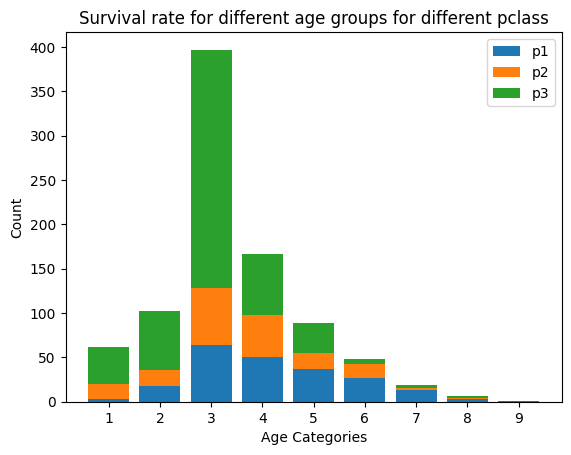

In [ ]:
import matplotlib.pyplot as plt

data = {'AgeGroup': ['1','2','3','4','5','6','7','8','9'],
        'c1':[t1,t4,t7,t10,t13,t16,t19,t22,t25],
        'c2':[t2,t5,t8,t11,t14,t17,t20,t23,t26],
        'c3':[t3,t6,t9,t12,t15,t18,t21,t24,t27]
}
df = pd.DataFrame(data)

# Create a stacked bar chart
fig, ax = plt.subplots()

# Plot 'Survived' and 'NotSurvived' columns as stacked bars
ax.bar(df['AgeGroup'], df['c1'], label='p1')
ax.bar(df['AgeGroup'], df['c2'], bottom=df['c1'], label='p2')
ax.bar(df['AgeGroup'], df['c3'], bottom=(df['c1']+df["c2"]), label='p3')


# Add labels and legend
ax.set_xlabel('Age Categories')
ax.set_ylabel('Count')
ax.set_title('Survival rate for different age groups for different pclass')
ax.legend()

# Show the plot
plt.show()


In [ ]:
# (b) A swarm plot overlayed on a violin plot depicting the distribution and survival status of passengers by Fare and Pclass.

import pandas as pd
df=pd.read_csv("/content/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


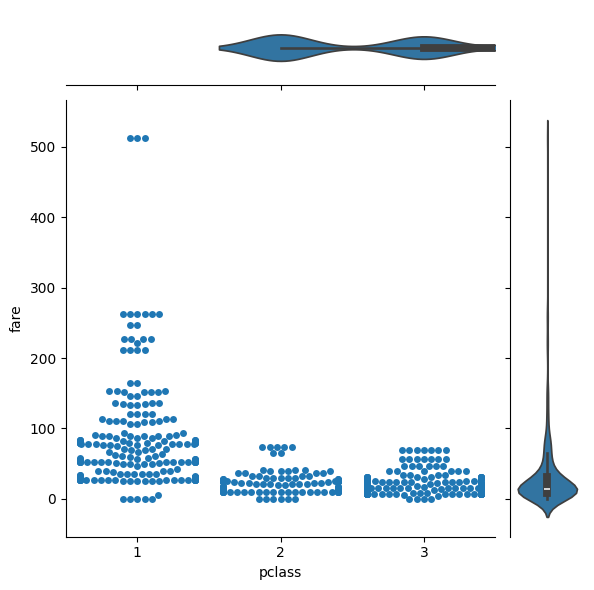

In [ ]:
import seaborn as sns
a=sns.JointGrid(data=df,x="pclass",y="fare")
a.plot(sns.swarmplot,sns.violinplot)

# Statistical Analysis

In [ ]:
'''
1.4 Statistical Analysis:
1. Conduct a statistical test to determine if there’s a significant difference in survival rates between different AgeGroups.
2. Analyze if FamilySize has a statistically significant effect on survival rate.
'''

In [ ]:
# 1. Conduct a statistical test to determine if there’s a significant difference in survival rates between different AgeGroups.

from scipy.stats import ttest_ind
# we have 2 dataframes: df1 and df2 having rows of their categories

# Extract survival rates for two groups
survival_rates_1 = df1['survived']
survival_rates_2 = df2['survived']

# Perform independent t-test
t_statistic, p_value = ttest_ind(survival_rates_1, survival_rates_2)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Compare the p-value to the significance level (α) to make a decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in survival rates between the two AgeGroups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in survival rates between the two AgeGroups.")


T-statistic: 2.6618911013848594
P-value: 0.008553370998440734
Reject the null hypothesis. There is a significant difference in survival rates between the two AgeGroups.


In [ ]:
# 2. Analyze if FamilySize has a statistically significant effect on survival rate.
